In [4]:
import matplotlib.pyplot as plt
import numpy as np
import nil
import pandas as pd
import seaborn as sns
import time


from os import listdir
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [20]:
def forest_test(X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=51)
    start = time.process_time()
    trained_forest = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)
    print(time.process_time() - start)
    prediction_forest = trained_forest.predict(x_test)
    print(confusion_matrix(y_test, prediction_forest))
    print(classification_report(y_test, prediction_forest))

In [6]:
def read_data_from_directory(wafer_class, machine_step):
    
    # Create an empty Dataframe to store all data
    df = pd.DataFrame()
    dir_content = listdir("../Wafer_Data/" + wafer_class + "/" + machine_step + "/")
    dir_content.sort()
    cnt = 0
    for file in dir_content:
        filepath = "../Wafer_Data/" + wafer_class + "/" + machine_step + "/" + file
        print("Reading File {0}".format(file))
        df = df.append(pd.read_csv(filepath))
            
        
    df = df.groupby(['WaferID', "STEP ID"]).describe(percentiles=[])
    wafer_class_bool = nil
    if 'good' in wafer_class:
        df.insert(loc=len(df.columns), column="CLASS", value='Good')
    elif 'bad' in wafer_class:
        df.insert(loc=len(df.columns), column="CLASS", value='Bad')
    return df

In [ ]:
def remove_columns(df):
    # Removing "COUNT" Column
    col_index = len(df.columns)-1-6
    while col_index >= 0:
        print('Removing Column Number: ', col_index)
        print(df.columns[col_index])
        df.drop(df.columns[col_index], axis=1, inplace=True)
        col_index = col_index - 6

    # Removing 50% Columns
    col_index = len(df.columns)-1-2
    while col_index >= 0:
        print('Removing Columns Number: ', col_index)
    #     df.drop(df.columns[col_index], axis=1, inplace=True)
        print(df.columns[col_index])
        col_index = col_index - 5

In [21]:
def run_z1():
    # reading all Z1 Data
    good_z1_df = read_data_from_directory("good_wafer", "Z1_100")
    bad_z1_df = read_data_from_directory("bad_wafer", "Z1_100")

    # Creating combined dataset of both good and bad
    df = pd.DataFrame(good_z1_df.append(bad_z1_df), columns=good_z1_df.columns)

    # Remove Unnecessary Columns
    remove_columns(df)

    # Configuring the Heatmap to make it easier to see 
    plt.figure(figsize = (30,30))
    sns.heatmap(df.corr(), annot=True)
    plt.show()

    # Dividing into Inputs and Outputs and run Random Forest Classification
    x_df = df.iloc[:,:-1]
    y_df = df.iloc[:,-1]
    x_df = x_df.fillna(0)
    forest_test(x_df, y_df)

In [22]:
def run_z2():
    # reading all Z1 Data
    good_z2_df = read_data_from_directory("good_wafer", "Z2_100")
    bad_z2_df = read_data_from_directory("bad_wafer", "Z2_100")

    # Creating combined dataset of both good and bad
    df = pd.DataFrame(good_z2_df.append(bad_z2_df), columns=good_z2_df.columns)

    # Remove Unnecessary Columns
    remove_columns(df)

    # Configuring the Heatmap to make it easier to see 
    plt.figure(figsize = (30,30))
    sns.heatmap(round(df.corr(),2), annot=True)
    plt.show()

    # Dividing into Inputs and Outputs and run Random Forest Classification
    x_df = df.iloc[:,:-1]
    y_df = df.iloc[:,-1]
    x_df = x_df.fillna(0)
    forest_test(x_df, y_df)

In [23]:
def run_z3():
    # reading all Z1 Data
    good_z2_df = read_data_from_directory("good_wafer", "Z3_100")
    bad_z2_df = read_data_from_directory("bad_wafer", "Z3_100")

    # Creating combined dataset of both good and bad
    df = pd.DataFrame(good_z2_df.append(bad_z2_df), columns=good_z2_df.columns)

    # Remove Unnecessary Columns
    remove_columns(df)

    # Configuring the Heatmap to make it easier to see 
    plt.figure(figsize = (30,30))
    sns.heatmap(round(df.corr(),2), annot=True)
    plt.show()

    # Dividing into Inputs and Outputs and run Random Forest Classification
    x_df = df.iloc[:,:-1]
    y_df = df.iloc[:,-1]
    x_df = x_df.fillna(0)
    forest_test(x_df, y_df)

Reading File Good_Z1_100 (1).csv
Reading File Good_Z1_100 (10).csv
Reading File Good_Z1_100 (100).csv
Reading File Good_Z1_100 (101).csv
Reading File Good_Z1_100 (102).csv
Reading File Good_Z1_100 (103).csv
Reading File Good_Z1_100 (104).csv
Reading File Good_Z1_100 (105).csv
Reading File Good_Z1_100 (106).csv
Reading File Good_Z1_100 (107).csv
Reading File Good_Z1_100 (108).csv
Reading File Good_Z1_100 (109).csv
Reading File Good_Z1_100 (11).csv
Reading File Good_Z1_100 (110).csv
Reading File Good_Z1_100 (111).csv
Reading File Good_Z1_100 (112).csv
Reading File Good_Z1_100 (113).csv
Reading File Good_Z1_100 (114).csv
Reading File Good_Z1_100 (115).csv
Reading File Good_Z1_100 (116).csv
Reading File Good_Z1_100 (117).csv
Reading File Good_Z1_100 (118).csv
Reading File Good_Z1_100 (119).csv
Reading File Good_Z1_100 (12).csv
Reading File Good_Z1_100 (120).csv
Reading File Good_Z1_100 (121).csv
Reading File Good_Z1_100 (122).csv
Reading File Good_Z1_100 (123).csv
Reading File Good_Z1_100 

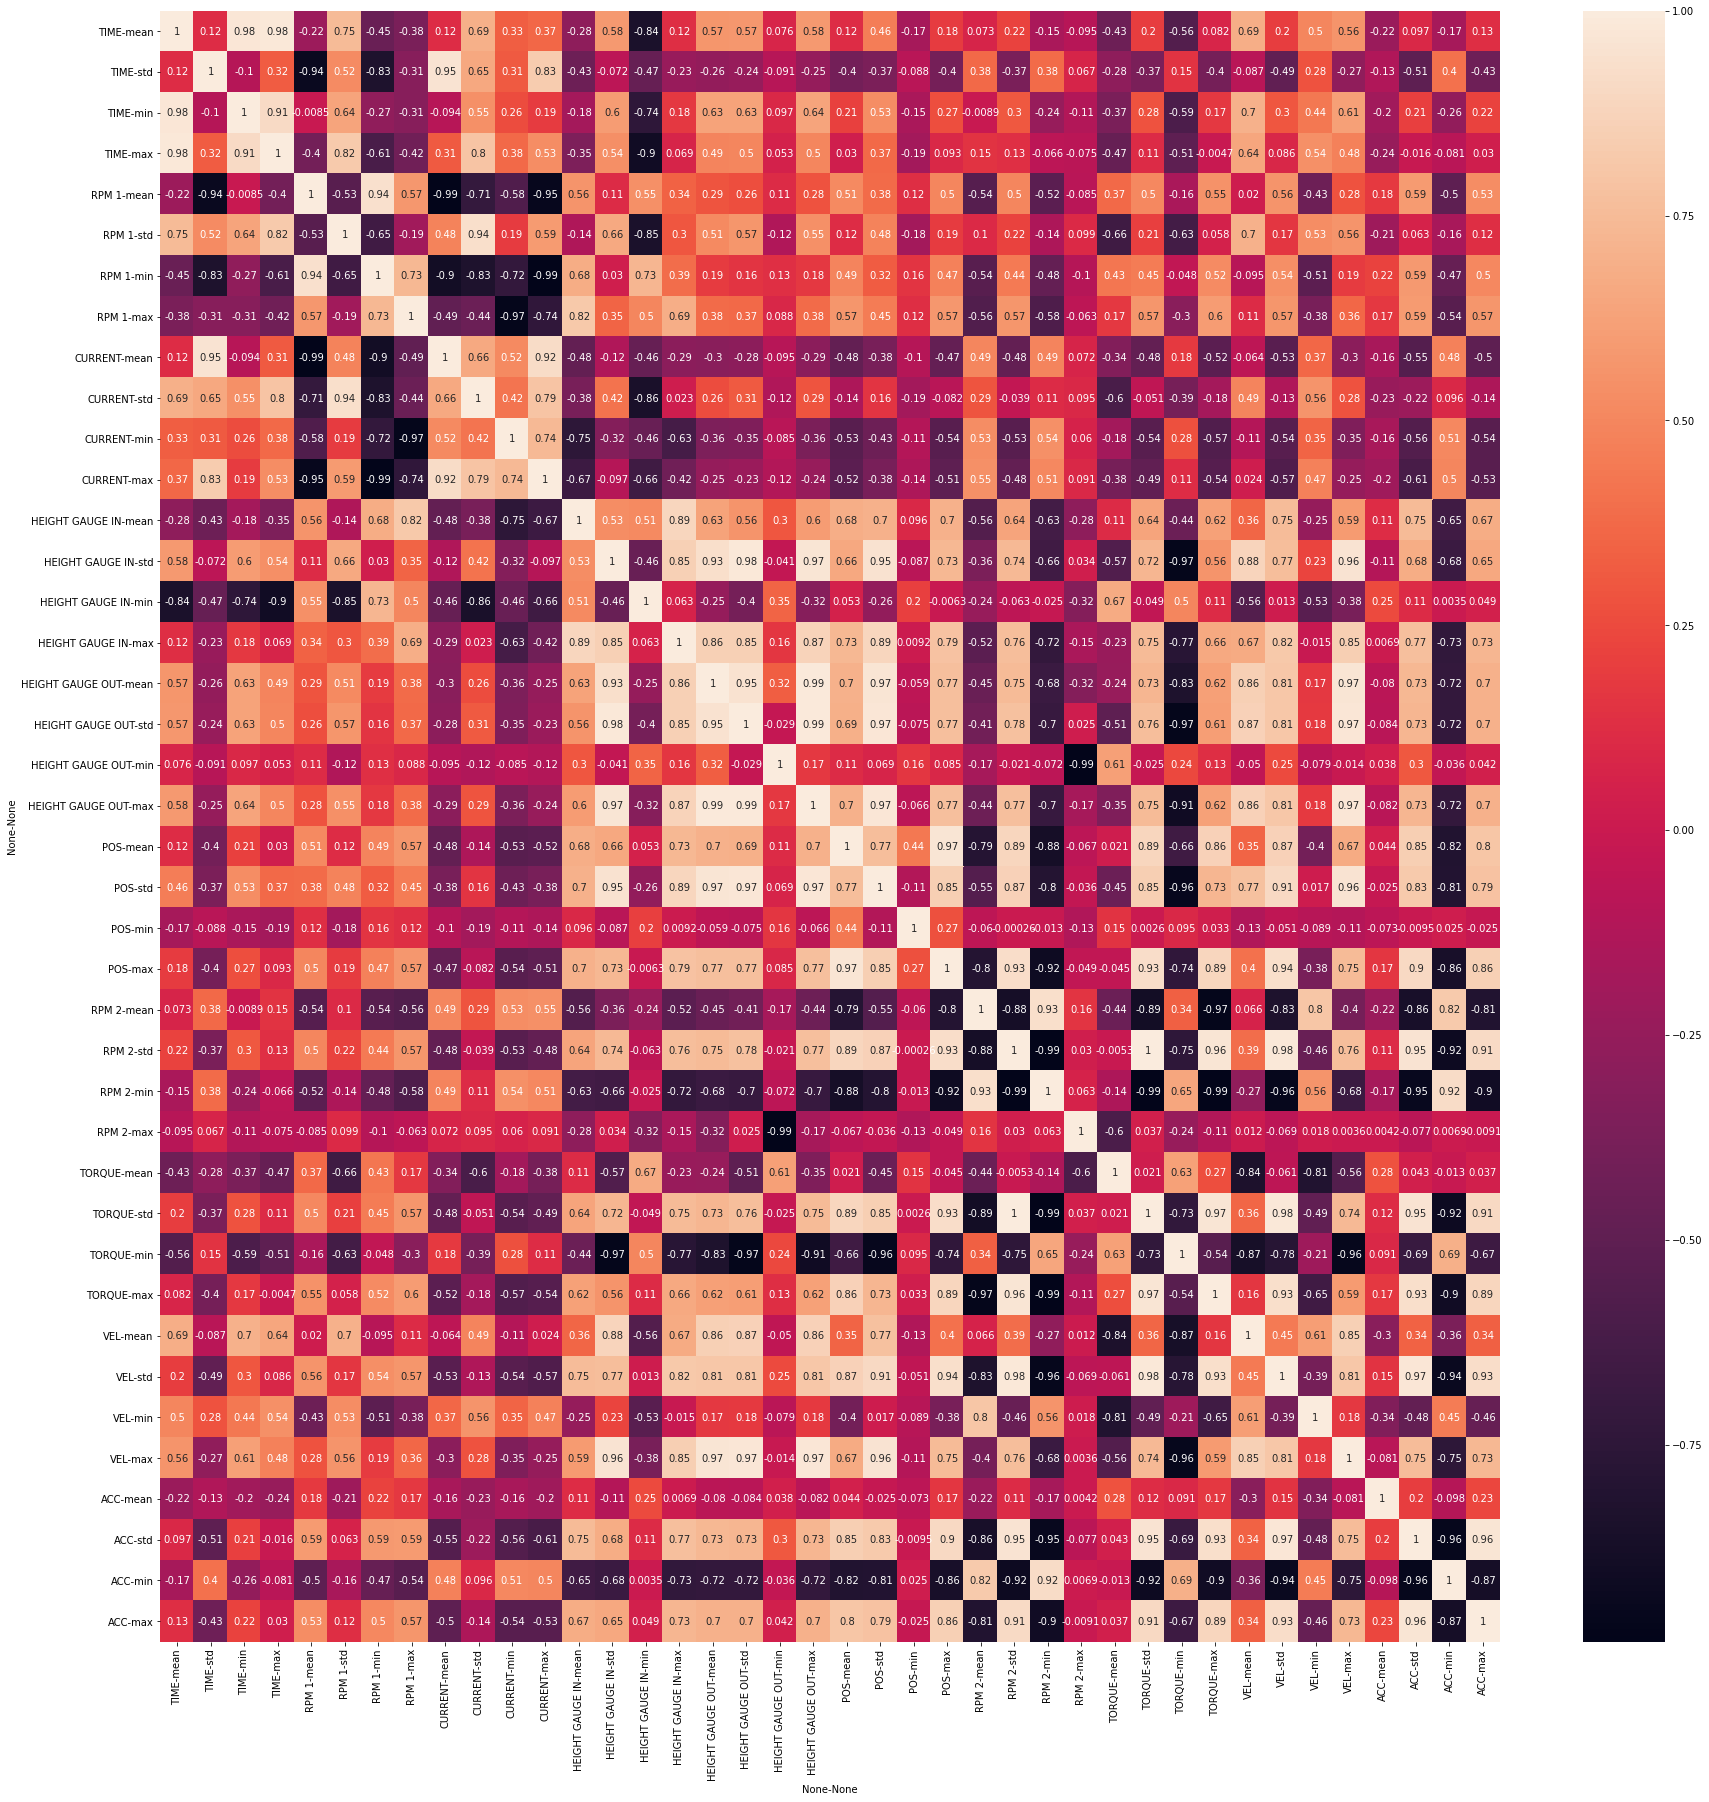

5.232443999999987
[[457  12]
 [ 19 422]]
              precision    recall  f1-score   support

         Bad       0.96      0.97      0.97       469
        Good       0.97      0.96      0.96       441

    accuracy                           0.97       910
   macro avg       0.97      0.97      0.97       910
weighted avg       0.97      0.97      0.97       910

Reading File Good_Z2_100 (1).csv
Reading File Good_Z2_100 (10).csv
Reading File Good_Z2_100 (100).csv
Reading File Good_Z2_100 (101).csv
Reading File Good_Z2_100 (102).csv
Reading File Good_Z2_100 (103).csv
Reading File Good_Z2_100 (104).csv
Reading File Good_Z2_100 (105).csv
Reading File Good_Z2_100 (106).csv
Reading File Good_Z2_100 (107).csv
Reading File Good_Z2_100 (108).csv
Reading File Good_Z2_100 (109).csv
Reading File Good_Z2_100 (11).csv
Reading File Good_Z2_100 (110).csv
Reading File Good_Z2_100 (111).csv
Reading File Good_Z2_100 (112).csv
Reading File Good_Z2_100 (113).csv
Reading File Good_Z2_100 (114).csv
Readin

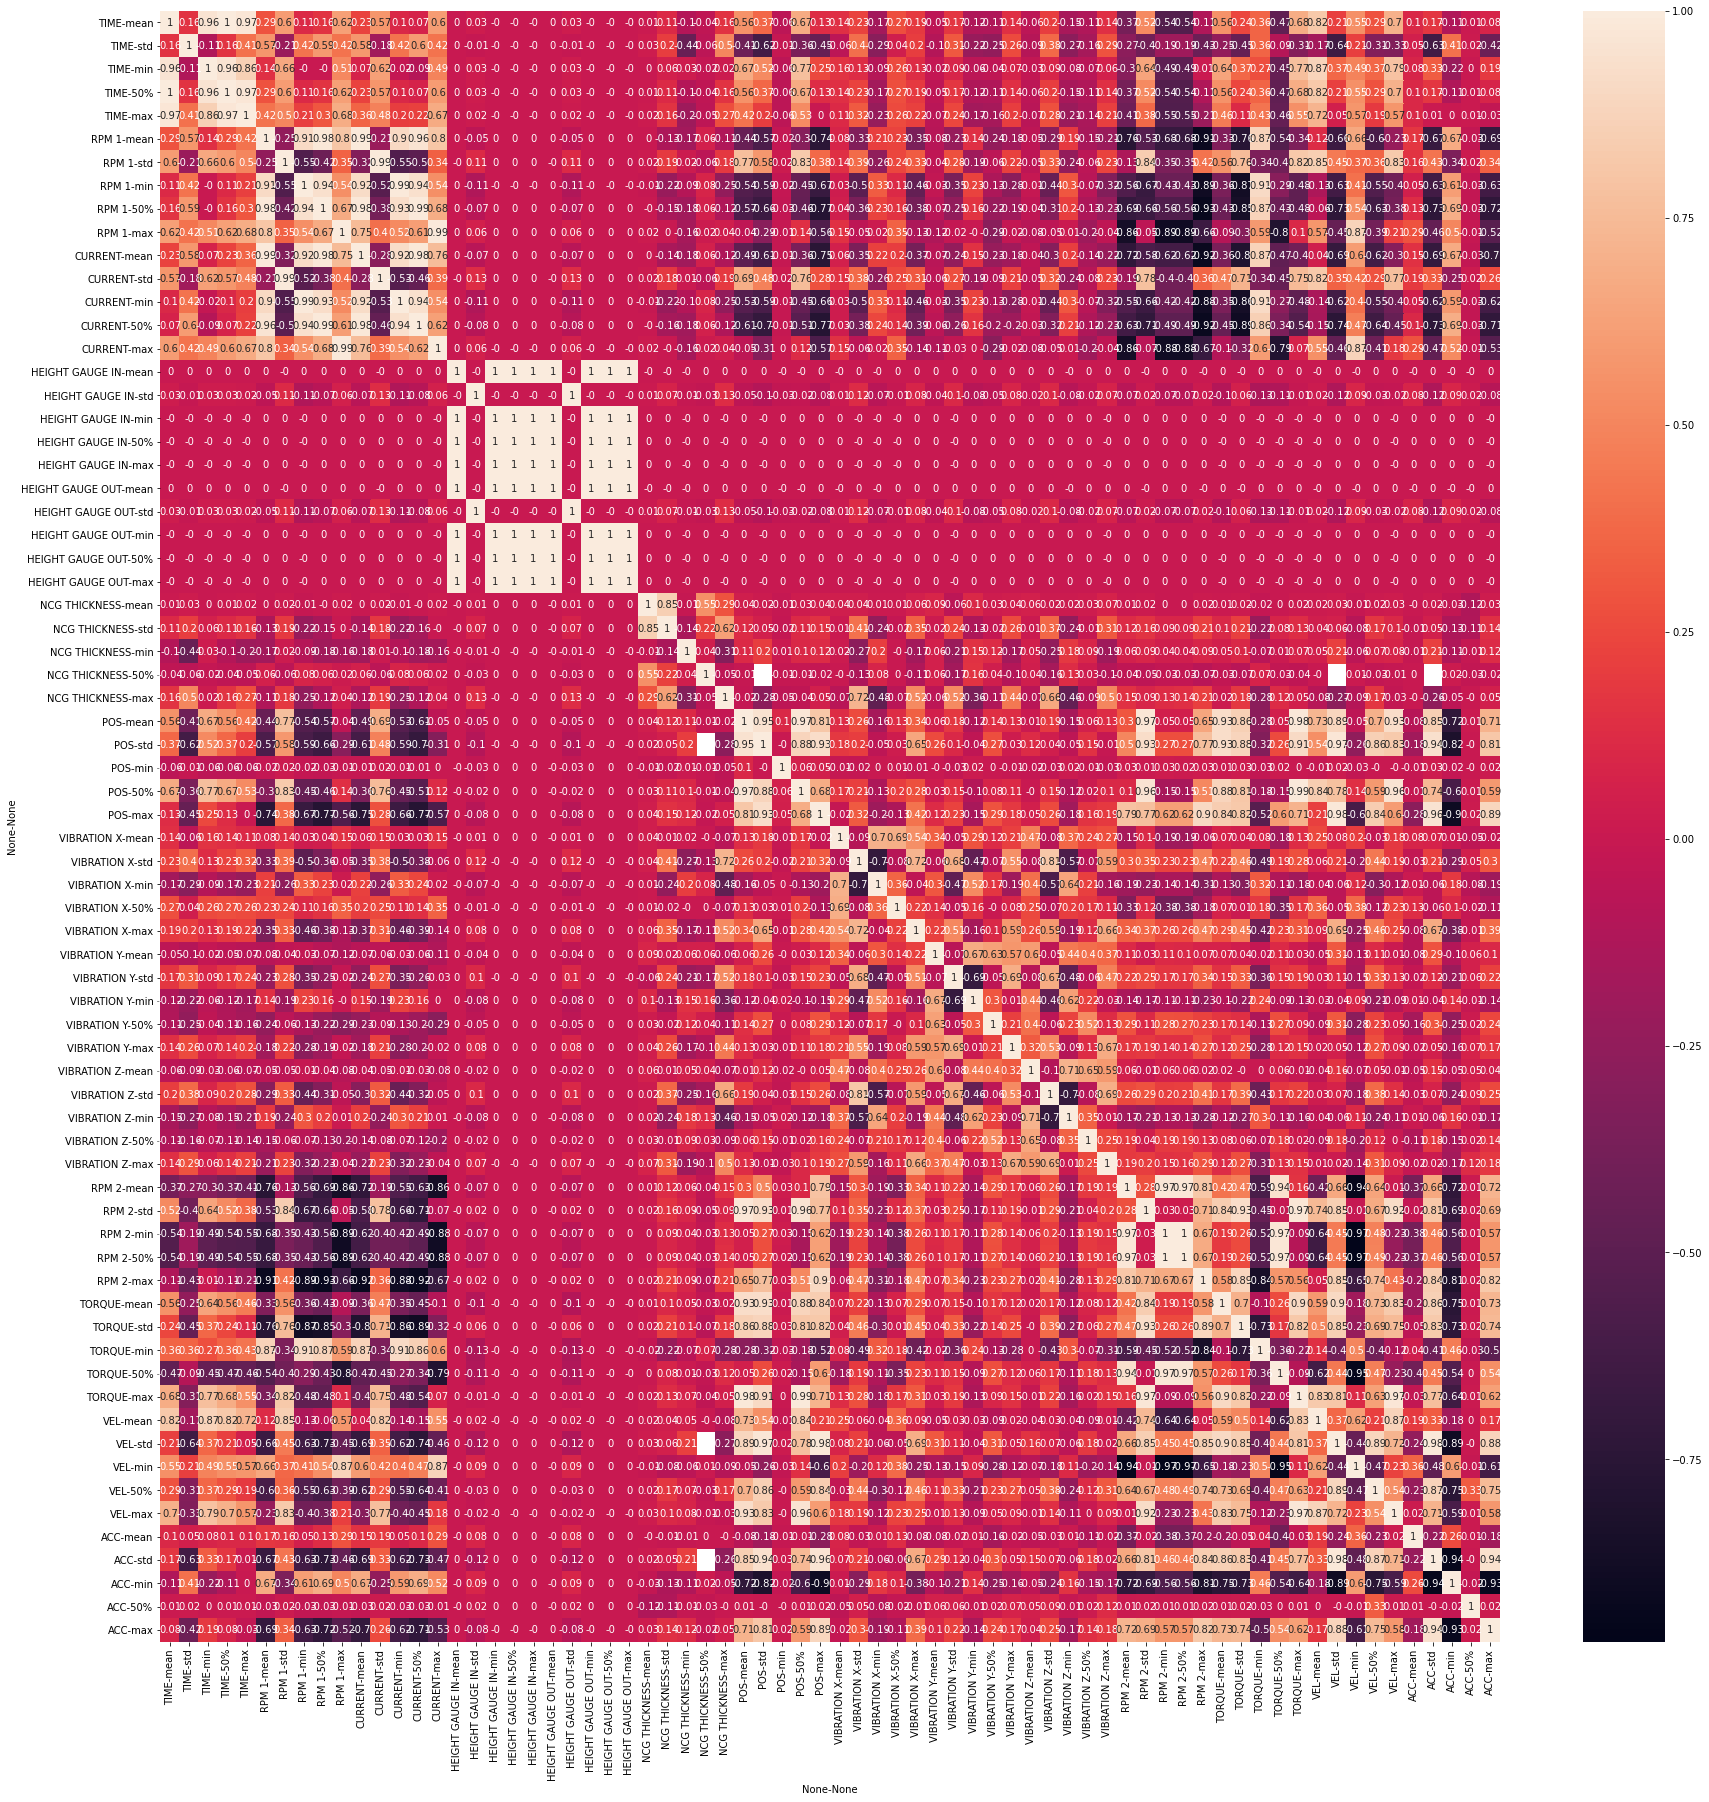

4.666870000000017
[[299  25]
 [ 23 331]]
              precision    recall  f1-score   support

         Bad       0.93      0.92      0.93       324
        Good       0.93      0.94      0.93       354

    accuracy                           0.93       678
   macro avg       0.93      0.93      0.93       678
weighted avg       0.93      0.93      0.93       678

Reading File Good_Z3_100 (1).csv
Reading File Good_Z3_100 (10).csv
Reading File Good_Z3_100 (100).csv
Reading File Good_Z3_100 (101).csv
Reading File Good_Z3_100 (102).csv
Reading File Good_Z3_100 (103).csv
Reading File Good_Z3_100 (104).csv
Reading File Good_Z3_100 (105).csv
Reading File Good_Z3_100 (106).csv
Reading File Good_Z3_100 (107).csv
Reading File Good_Z3_100 (108).csv
Reading File Good_Z3_100 (109).csv
Reading File Good_Z3_100 (11).csv
Reading File Good_Z3_100 (110).csv
Reading File Good_Z3_100 (111).csv
Reading File Good_Z3_100 (112).csv
Reading File Good_Z3_100 (113).csv
Reading File Good_Z3_100 (114).csv
Readin

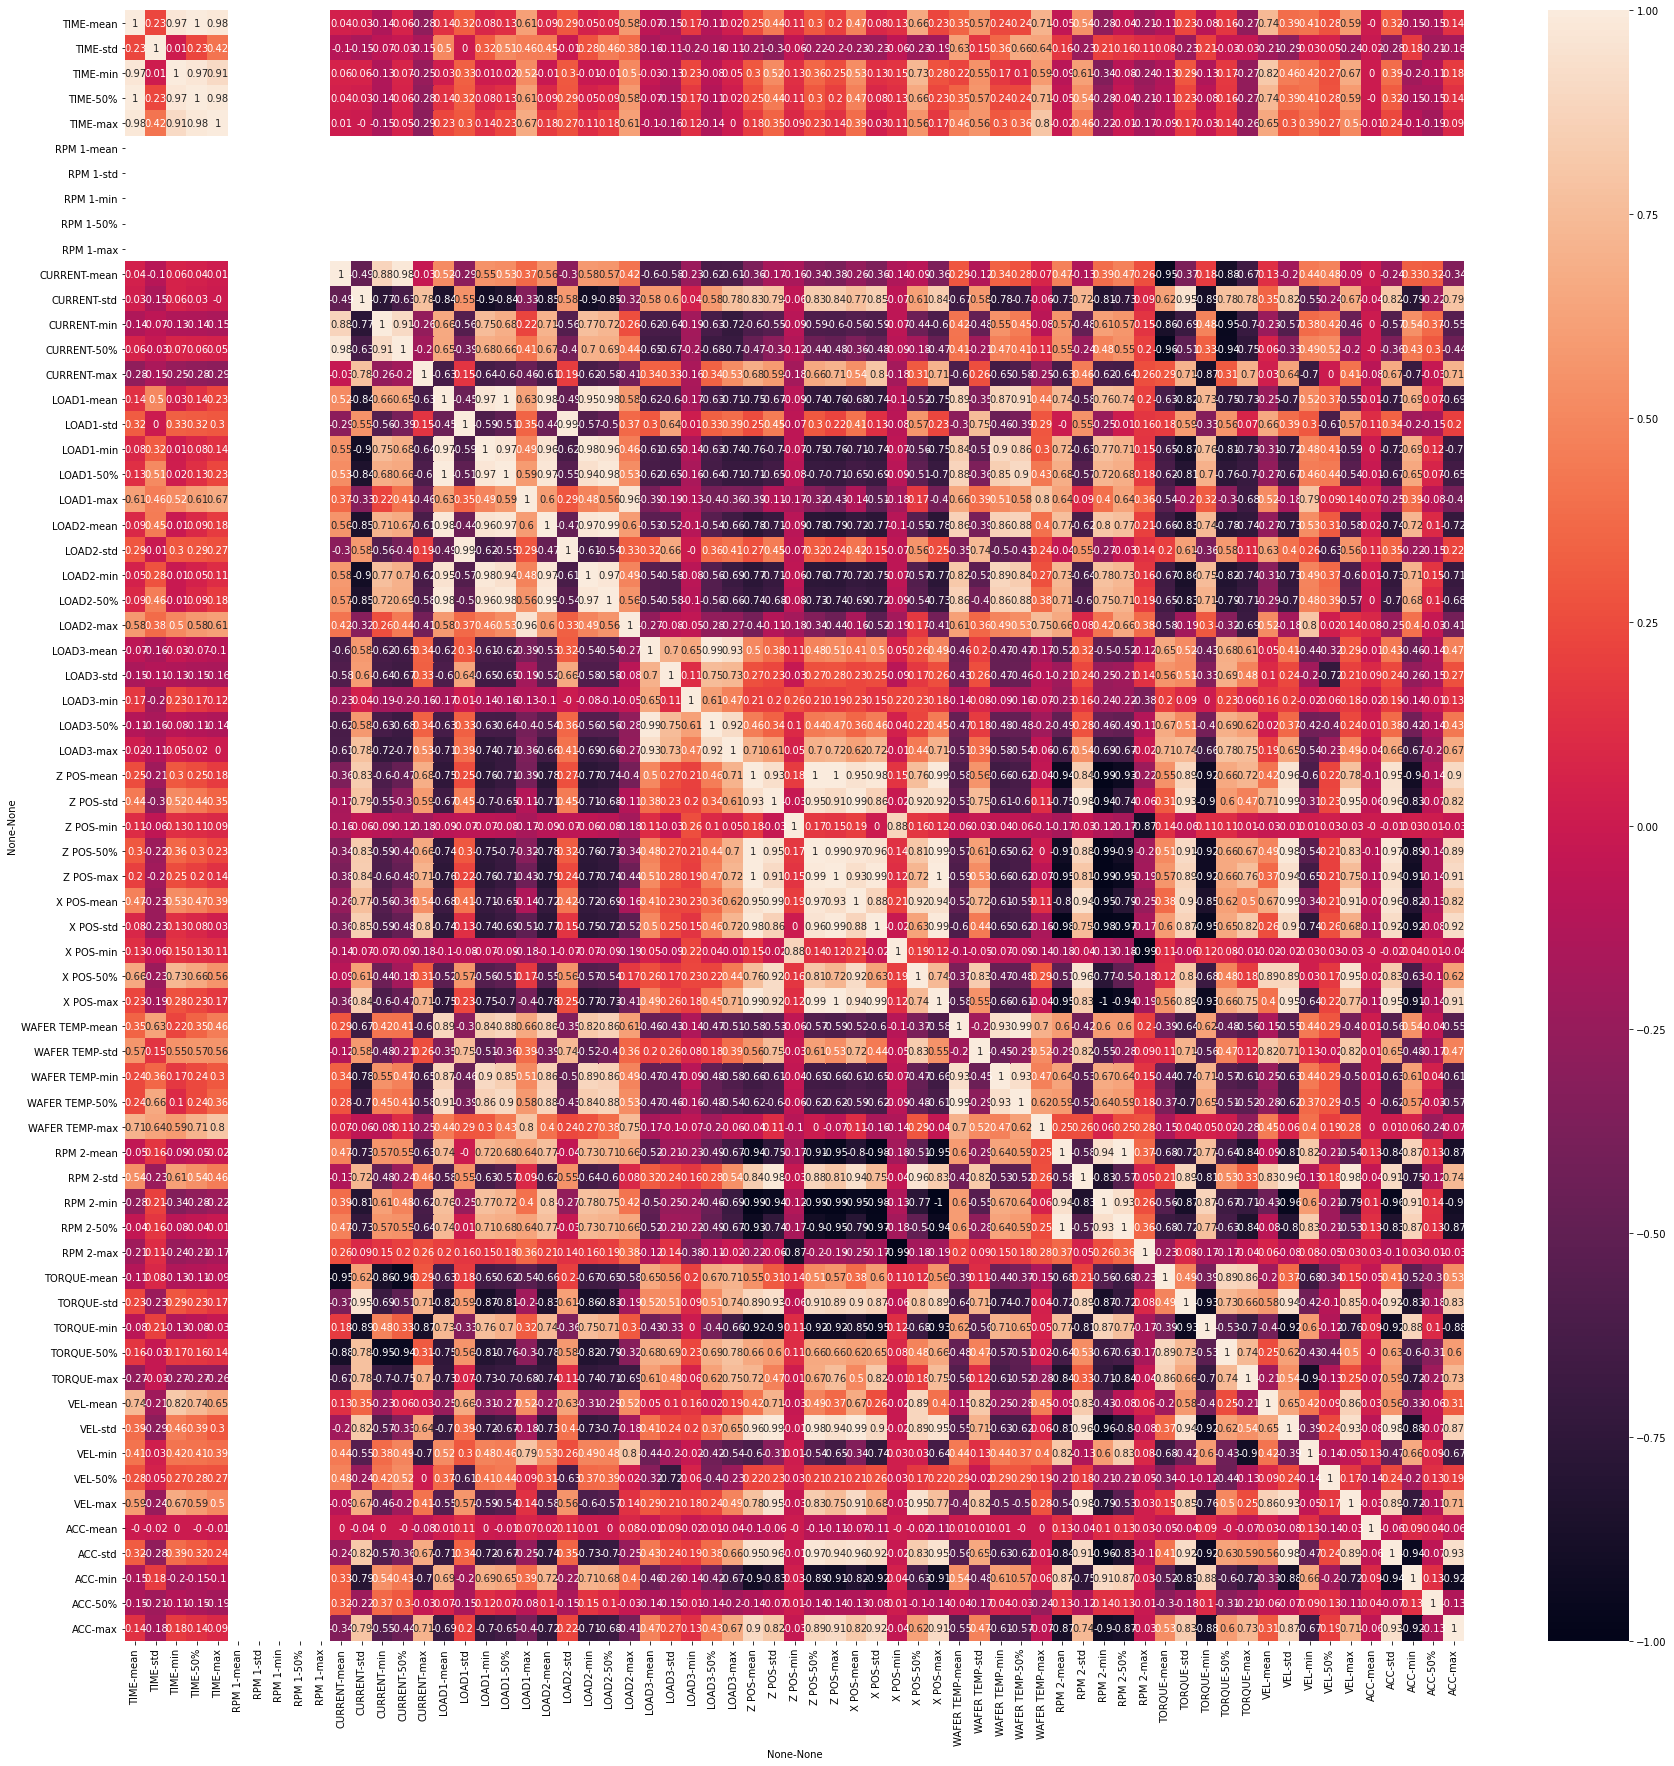

7.2243390000001
[[515  17]
 [ 25 485]]
              precision    recall  f1-score   support

         Bad       0.95      0.97      0.96       532
        Good       0.97      0.95      0.96       510

    accuracy                           0.96      1042
   macro avg       0.96      0.96      0.96      1042
weighted avg       0.96      0.96      0.96      1042



In [24]:
if __name__ == "__main__":
    run_z1()
    run_z2()
    run_z3()